## Manhattan Restaurant Inspection Results, using CSV
This dataset provides restaurant inspections, violations, grades and adjudication information.
1. https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/rs6k-p7g6
2. The data set is collected by Department of Health and Mental Hygiene
3. They started collecting around mid-2014 and I selected only restaurants in Manhattan due to the size of the dataset.
4. This dataset is interesting because first it is a great way to see the rating of your favorite restaurants and their inspection results. Second, I am curious how they inspect and rate the restaurants.
5. Questions to answer: 
    1. Correlation between geological area and grade?:
        Will there be a place where all the food are graded A or is there a place that no places graded A? 
    2. Correlation between food type and grade?: 
        What kind of food type has highest grade/lowest grade? What are the common type of violation? 
    3. Given geological and food type and date of inspection, can we predict the grade?

# There are huge complexities in changing it to csv... The difficulties come in two ways:
1. The data structure that in csv is 2-dim arraies, it is difficult first to construct and manage this data structure and in an efficient structure since our data set is huge. 
2. Since I implemented many pandas methods 
    1. apply(), 
    2. describe(), 
    3. change to categorical value: cat.codes
    4. value_counts(), 
    5. from_dict(), 
    6. astype(), 
    7. notna(), 
    8. ..... 
    
    It would cost me many time to implement all of them in python. This also makes me realize and appreciate how Pandas is really compact and efficient and useful. 2 lines of code of pandas may require me to use 20 lines in python.... 

Due to the time constraint, I will leave it as the old notebook.

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/kexin/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kexin/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Part 1

In [2]:
data=pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

In [3]:
data.head(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40367728,MIMIS RESTAURANT & BAR,MANHATTAN,984,SECOND AVENUE,10022.0,2126884692,Italian,01/15/2015,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,21.0,NaN,NaN,10/02/2018,Cycle Inspection / Initial Inspection
1,41424929,AAHELI,MANHATTAN,826,9 AVENUE,10019.0,2129699010,Indian,03/15/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,03/15/2016,10/02/2018,Cycle Inspection / Re-inspection
2,41661008,AMURA JAPANESE RESTAURANT,MANHATTAN,1567,2ND AVE,10028.0,2127721688,Japanese,09/15/2015,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,30.0,NaN,NaN,10/02/2018,Cycle Inspection / Initial Inspection
3,50048823,POMMES FRITES,MANHATTAN,128,MACDOUGAL ST,10012.0,2126741234,Other,06/21/2018,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,28.0,NaN,NaN,10/02/2018,Cycle Inspection / Initial Inspection
4,41599272,LE MOULIN A CAFE,MANHATTAN,1439,YORK AVENUE,10075.0,2122885088,CafÃ©/Coffee/Tea,05/13/2016,Violations were cited in the following area(s).,10E,Accurate thermometer not provided in refrigera...,Not Critical,7.0,A,05/13/2016,10/02/2018,Cycle Inspection / Initial Inspection


# Extra Credit 3. data size larger than 5,000

In [4]:
data.shape

(149847, 18)

In [5]:
data.dtypes

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
dtype: object

## format of the data:
1. Pandas DataFrame. The data has 149847 rows and 18 columns: each row represents a restaurant and the 18 columns describe the geographical info, date of inspection, violation reason, grade, type of cuisine and etc. 
2. With different columns have different type. For example, the first column is numpy.int64; and there are numpy.float64 for the ZIPCODE column; there are also Str.

## Problems in the data:
1. There are columns that are irrelevant, select them to form different sub dataset to tackle different problems
2. The Grade has many NaN: Filter them
3. rows need to be sorted cuisine type/zipcode and categorize each type to a number so that we can run stats
4. the ZIPCODE is float, convert to int

### Right now, I couldn't answer any of my questions...

# Part 2

In [6]:
#filter out all NaN grade rows
data=data[data['GRADE'].notna()]

In [7]:
data['GRADE'].value_counts()

A                 60336
B                  9208
C                  2814
Z                  1863
P                   782
Not Yet Graded      581
Name: GRADE, dtype: int64

## we don't need not yet graded info, drop them

In [8]:
data=data[data['GRADE']!='Not Yet Graded']

## subdataset with zip and grade to understand the relationship between geography and grade


In [9]:
data_zip=data[['ZIPCODE','GRADE','SCORE']]

## filter out zip with NaN


In [10]:
data_zip=data_zip[data_zip['ZIPCODE'].notna()] 
data_zip['ZIPCODE']=data_zip['ZIPCODE'].astype('int64')

In [11]:
data_zip.head() # data subset 1, to examine question 1

,ZIPCODE,GRADE,SCORE
1,10019,A,7.0
4,10075,A,7.0
5,10010,A,7.0
6,10002,A,3.0
10,10033,A,11.0


In [12]:
data_zip.dtypes

ZIPCODE      int64
GRADE       object
SCORE      float64
dtype: object

In [13]:
data_zip['ZIPCODE'].value_counts()[1:10]

10019    4755
10036    4296
10013    3849
10002    3489
10001    3423
10016    3389
10022    3227
10011    3040
10012    2897
Name: ZIPCODE, dtype: int64

In [14]:
data_zip['GRADE'].value_counts()

A    59163
B     9073
C     2748
Z     1831
P      764
Name: GRADE, dtype: int64

## add a column with zipcode categorical values for problem C

In [15]:
data_zip['ZIPCODE'] = data_zip['ZIPCODE'].astype('category')

In [16]:
data_zip['ZIPCODE_Encode'] = data_zip['ZIPCODE'].cat.codes

In [17]:
data_zip.head()

,ZIPCODE,GRADE,SCORE,ZIPCODE_Encode
1,10019,A,7.0,17
4,10075,A,7.0,45
5,10010,A,7.0,9
6,10002,A,3.0,2
10,10033,A,11.0,31


In [18]:
data_zip['GRADE'] = data_zip['GRADE'].astype('category')
data_zip['GRADE_Encode'] = data_zip['GRADE'].cat.codes

In [19]:
data_zip['GRADE_Encode'].value_counts()

0    59163
1     9073
2     2748
4     1831
3      764
Name: GRADE_Encode, dtype: int64

In [20]:
zip_arr=data_zip['ZIPCODE'].unique()

In [21]:
def zip_add(row):
    dict_x[row['ZIPCODE']][row['GRADE_Encode']]+=1

In [22]:
dict_x={key: [0,0,0,0,0] for key in zip_arr}
x=data_zip.apply(lambda x: zip_add(x), axis=1)

In [23]:
zip_dist=pd.DataFrame.from_dict(dict_x,orient='index',columns=data_zip['GRADE'].unique())

In [24]:
zip_dist.head()

,A,B,C,Z,P
10019,3992,496,146,23,98
10075,562,24,25,10,16
10010,1574,205,54,16,35
10002,2639,551,138,70,91
10033,644,113,23,3,12


## Part 3 for Question A: 
### We want to construct a table where each row is Unique ZIPCODE and columns are the grades, and then we check if for each ZIPCODE, the distribution over all grades are uniform, or in a peaky form, compared with the distribution over the the grade for every restaurant

In [25]:
zip_dist.to_csv('data_cleaned1.csv')

In [27]:
data1=zip_dist

## Some stats

In [28]:
zip_dist.describe()

,A,B,C,Z,P
count,82.000000,82.000000,82.000000,82.000000,82.000000
mean,721.500000,110.646341,33.512195,9.317073,22.329268
std,1024.106804,161.770327,48.792138,14.385245,31.770028
min,2.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000
50%,175.500000,15.000000,4.500000,1.000000,4.000000
75%,1078.000000,169.250000,52.250000,13.750000,39.500000
max,3992.000000,621.000000,213.000000,70.000000,128.000000


In [29]:
sum_zip=zip_dist.sum(axis=1)

In [30]:
zip_dist=zip_dist.apply(lambda x:x/float(sum(x)), axis=1)

In [31]:
zip_dist.head()

,A,B,C,Z,P
10019,0.839537,0.104311,0.030705,0.004837,0.020610
10075,0.882261,0.037677,0.039246,0.015699,0.025118
10010,0.835456,0.108811,0.028662,0.008493,0.018577
10002,0.756377,0.157925,0.039553,0.020063,0.026082
10033,0.810063,0.142138,0.028931,0.003774,0.015094


## We use symmetric KL divergence to measure the difference between 2 distributions

In [32]:
q=(data_zip['GRADE'].value_counts()/sum(data_zip['GRADE'].value_counts())).values

In [33]:
q

array([0.80407453, 0.12330964, 0.03734761, 0.02488482, 0.0103834 ])

In [34]:
zip_dist.iloc[0].values

array([0.83953733, 0.10431125, 0.03070452, 0.00483701, 0.02060988])

In [35]:
def kl(p,q):
    q=q+1e-10
    p=p+1e-10 #numerical stability
    return (np.sum(np.log(p/q)*p)+np.sum(np.log(q/p)*q))/2

In [36]:
zip_kl=zip_dist.apply(lambda row: kl(row.values,q), axis=1)

## Extra Credit 4, Visualization 1

(array([42.,  3.,  0.,  7.,  0.,  1.,  0.,  0.,  2., 27.]),
 array([0.00846255, 0.20930941, 0.41015627, 0.61100313, 0.81184999,
        1.01269684, 1.2135437 , 1.41439056, 1.61523742, 1.81608428,
        2.01693114]),
 <a list of 10 Patch objects>)

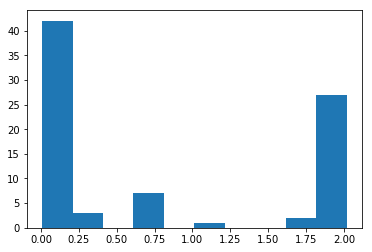

In [37]:
plt.hist(zip_kl.values)

## This means out of 82 ZIPCODEs, 40~ are really similar to the default distribution, that is, it is unaffected, but there are many away from the default, basically means some places have different distributions. In other words, it is correlated in some places.

## Part 2 for Question B:

In [38]:
data_food_type=data[['CUISINE DESCRIPTION','GRADE','SCORE']]#data subset 2, to examine question 2

In [39]:
data_food_type.head()

,CUISINE DESCRIPTION,GRADE,SCORE
1,Indian,A,7.0
4,CafÃ©/Coffee/Tea,A,7.0
5,Vegetarian,A,7.0
6,CafÃ©/Coffee/Tea,A,3.0
10,Spanish,A,11.0


In [40]:
data_food_type.dtypes

CUISINE DESCRIPTION     object
GRADE                   object
SCORE                  float64
dtype: object

## Half of Part 2 and Part 3 for Question B,
we do the same thing as in Question A

/home/kexin/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/kexin/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(array([46., 12.,  7.,  2.,  0.,  1.,  1.,  3.,  9.,  1.]),
 array([0.00314789, 0.24362007, 0.48409225, 0.72456443, 0.96503661,
        1.20550879, 1.44598097, 1.68645315, 1.92692533, 2.16739751,
        2.4078697 ]),
 <a list of 10 Patch objects>)

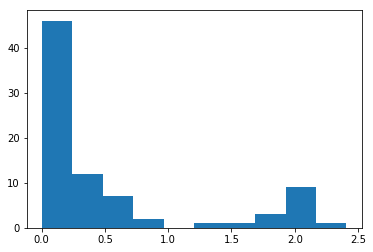

In [41]:
data_food_type['GRADE'] = data_food_type['GRADE'].astype('category')

data_food_type['GRADE_Encode'] = data_food_type['GRADE'].cat.codes

data_food_type['GRADE_Encode'].value_counts()

food_arr=data_food_type['CUISINE DESCRIPTION'].unique()
                                                         
dict_f={key: [0,0,0,0,0] for key in food_arr}
                                                         
def food_add(row):
    dict_f[row['CUISINE DESCRIPTION']][row['GRADE_Encode']]+=1

x=data_food_type.apply(lambda x: food_add(x), axis=1)

food_dist=pd.DataFrame.from_dict(dict_f,orient='index',columns=data_food_type['GRADE'].unique())

food_dist.to_csv('data_cleaned2.csv')

data2=food_dist

sum_food=food_dist.sum(axis=1)

food_dist=food_dist.apply(lambda x:x/float(sum(x)), axis=1)

food_kl=food_dist.apply(lambda row: kl(row.values,q), axis=1)

plt.hist(food_kl.values)

## Extra Credit 4, Visualization 2

## We can see food type is less correlated

In [42]:
food_dist.head(10)

,A,B,C,Z,P
Indian,0.673328,0.171407,0.096080,0.027671,0.031514
CafÃ©/Coffee/Tea,0.912950,0.044405,0.016041,0.008216,0.018388
Vegetarian,0.853712,0.093886,0.021834,0.008734,0.021834
Spanish,0.708333,0.154167,0.055208,0.011458,0.070833
Sandwiches,0.919105,0.043890,0.014630,0.010327,0.012048
American,0.844577,0.098617,0.031917,0.006178,0.018712
Salads,0.938667,0.029333,0.000000,0.002667,0.029333
Vietnamese/Cambodian/Malaysia,0.689855,0.211594,0.069565,0.002899,0.026087
"Latin (Cuban, Dominican, Puerto Rican, South & Central American)",0.656382,0.213551,0.081670,0.012099,0.036298
Bakery,0.787493,0.134916,0.034742,0.015055,0.027794


In [43]:
food_dist.shape

(82, 5)

## some stats

In [44]:
food_dist.describe()

,A,B,C,Z,P
count,82.000000,82.000000,82.000000,82.000000,82.000000
mean,0.807124,0.106431,0.042081,0.013932,0.030432
std,0.144051,0.083312,0.080817,0.018139,0.046782
min,0.250000,0.000000,0.000000,0.000000,0.000000
25%,0.729302,0.051068,0.000000,0.000000,0.000000
50%,0.842034,0.094113,0.024294,0.009371,0.018550
75%,0.902252,0.145541,0.045266,0.015959,0.032249
max,1.000000,0.378109,0.545455,0.080000,0.234568


In [45]:
data_date=data[['INSPECTION DATE','GRADE','SCORE']] # data subset 3, to answer question 3

In [46]:
data_date.head()

,INSPECTION DATE,GRADE,SCORE
1,03/15/2016,A,7.0
4,05/13/2016,A,7.0
5,07/02/2018,A,7.0
6,02/07/2018,A,3.0
10,02/16/2018,A,11.0


## Question C, we uses a simple Multi Level Perceptron as the model. Then each row is a data point with three features: inspection date, food type and zipcode. We separate 8:2 for train:test (val is omitted here because I am not going to tune any big parameter (hidden size...) due to time constraint, but sklearn actually automatically generates validation set to tune on small parameters...) 

In [47]:
from sklearn.neural_network import MLPClassifier

In [48]:
data_nn_x=data[['ZIPCODE','INSPECTION DATE','CUISINE DESCRIPTION']]

In [49]:
data_nn_x = data_nn_x.astype('category')

In [50]:
data_nn_x.dtypes

ZIPCODE                category
INSPECTION DATE        category
CUISINE DESCRIPTION    category
dtype: object

### Change to categorical values

In [51]:
data_nn_x['ZIPCODE'] = data_nn_x['ZIPCODE'].cat.codes
data_nn_x['INSPECTION DATE'] = data_nn_x['INSPECTION DATE'].cat.codes
data_nn_x['CUISINE DESCRIPTION'] = data_nn_x['CUISINE DESCRIPTION'].cat.codes

In [52]:
nn_x=data_nn_x.values #3 features 

In [62]:
data_nn_x.head()

,ZIPCODE,INSPECTION DATE,CUISINE DESCRIPTION
1,17,217,39
4,45,406,13
5,9,570,80
6,2,109,13
10,31,136,74


In [53]:
nn_y=data['GRADE'].astype('category').cat.codes.values

In [54]:
nn_y

array([0, 0, 0, ..., 0, 0, 4], dtype=int8)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
...     nn_x, nn_y, test_size=0.2, random_state=42)

In [57]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
...                     hidden_layer_sizes=(5, 3), random_state=1)

In [58]:
clf.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [59]:
y_predict=clf.predict(X_test)

In [60]:
acc=sum(y_predict==y_test)/len(y_predict)

In [61]:
acc

0.807812812479168

# Pretty high accuracy!

## But the tricky thing is actually, the model fails miserably... Because it predicts all 0, since 0 corresponds to A and there are 80% A. 

## This means the model finds the data gives A all the time no matter how features change. This either has two explanations:
1. The model is bad
2. These features are bad

So the answer to question C is not answered here..

## Part 4, since I did many transformations to compute KL and it will be a nightmare to compute using excel from the start, I only include a check on stats of the zip_dist and food_dist data 

# for zip_dist, the excel result coincides with our result: https://docs.google.com/spreadsheets/d/10HteuJVwM6nmOb6fyuqBvfp81h5efrF_xxdr1vkK2GU/edit?usp=sharing

## Same case for food_dist, the excel result coincides with ours:
https://docs.google.com/spreadsheets/d/1jVq-Gzs1mT1J3VQP-wNtmSXxvv0Xi1_gRrWp61XZrQA/edit?usp=sharing